In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU, Dropout, Dense, Input
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

2024-04-06 15:04:39.726001: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 15:04:39.726130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 15:04:39.872004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.DataFrame()

In [3]:
df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/BAJAJFINSV.csv")

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3201 non-null   int64  
 14  %Deliverble         3201 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.2

In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [7]:
df['Date'].nunique() == df.shape[0]

True

<Axes: >

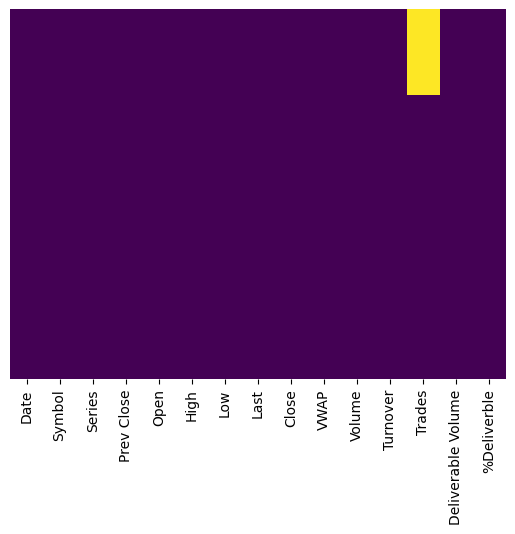

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df['Trades'].isnull().sum()

745

In [10]:
df = df.dropna()

<Axes: >

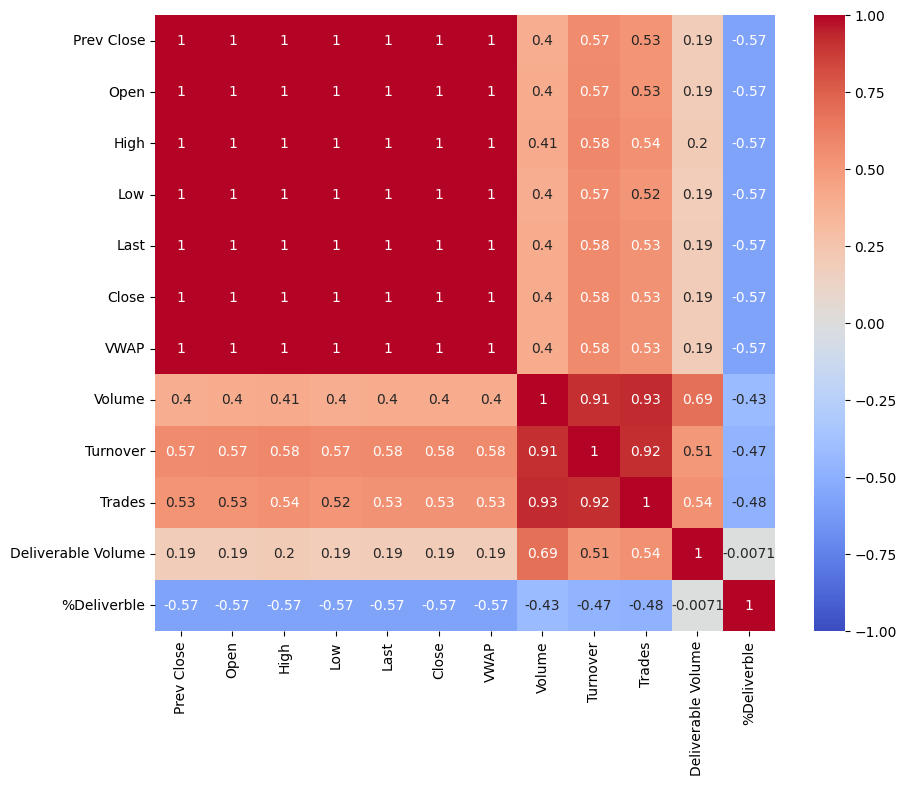

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(exclude=['object']).corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

In [12]:
filter_df = df[['Date','High', 'Low','Volume','Trades']]


In [13]:
filter_df.head()

,Date,High,Low,Volume,Trades
745,2011-06-01,528.95,517.1,113360,4155.0
746,2011-06-02,519.85,504.0,62967,2437.0
747,2011-06-03,520.00,506.0,36445,1754.0
748,2011-06-06,508.00,496.0,33537,1346.0
749,2011-06-07,552.00,503.0,1237385,36245.0


In [14]:
filter_df.set_index(keys='Date', inplace=True)

In [15]:
filter_df.head()

,High,Low,Volume,Trades
Date,,,,
2011-06-01,528.95,517.1,113360,4155.0
2011-06-02,519.85,504.0,62967,2437.0
2011-06-03,520.00,506.0,36445,1754.0
2011-06-06,508.00,496.0,33537,1346.0
2011-06-07,552.00,503.0,1237385,36245.0


In [16]:
filter_df['Trades_MA'] = filter_df.iloc[:, 3].expanding(min_periods=3).mean()

In [17]:
filter_df.dropna(inplace=True)


In [18]:
X = filter_df.drop(columns='Trades').values
y = filter_df['Trades'].values

In [19]:
X.shape


(2454, 4)

In [20]:
x_robust_scaler = RobustScaler()
y_robust_scaler = RobustScaler()
X = x_robust_scaler.fit_transform(X)
y = y_robust_scaler.fit_transform(y.reshape(-1, 1))

In [21]:
x_minmax_scaler = MinMaxScaler()
y_minmax_scaler = MinMaxScaler()
X = x_minmax_scaler.fit_transform(X)
y = y_minmax_scaler.fit_transform(y)

In [22]:
X_train = X[:2000]
X_test = X[2000:]

y_train = y[:2000]
y_test = y[2000:]

In [23]:
X_train = X_train.reshape((-1,1,4))
X_test = X_test.reshape((-1,1,4))

In [24]:
model = tf.keras.Sequential([
    Input((1, 4)),
    GRU(units=214, return_sequences=True),
    Dropout(0.2),
    GRU(units=224),
    Dropout(0.2),
    Dense(units=1, activation='linear')
])

In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 214)         │       141,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 214)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 224)            │       295,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,145 (1.67 MB)

 Trainable params: 437,145 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    monitor='val_loss'
)

In [27]:
model.compile(loss='mse', optimizer='adam')


In [28]:
history = model.fit(
    X_train,
    y_train,
    batch_size=250, 
    epochs=100, 
    validation_split=0.15,
    callbacks = [early_stopping]
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.7401e-04 - val_loss: 0.0024
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.3689e-04 - val_loss: 0.0015
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.1758e-04 - val_loss: 0.0012
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.6132e-04 - val_loss: 0.0013
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.7955e-04 - val_loss: 0.0011
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.3778e-04 - val_loss: 9.6009e-04
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.3849e-04 - val_loss: 9.7007e-04
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.6179e-04 - val_loss: 0.0010
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.6754e-04 - val_loss: 9.5615e-04
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.7205e-04 - val_loss: 0.0011
Epoch 12/100
7/7 ━━━━

In [29]:
model.evaluate(X_test, y_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 


0.01619727723300457

In [30]:
y_pred = model.predict(X_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [31]:
y_test = y_minmax_scaler.inverse_transform(y_test)
y_pred = y_minmax_scaler.inverse_transform(y_pred) 

y_test = y_robust_scaler.inverse_transform(y_test)
y_pred = y_robust_scaler.inverse_transform(y_pred) 

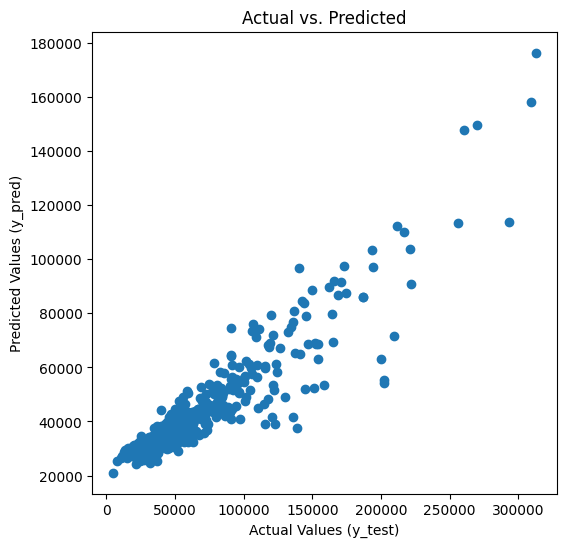

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted")
plt.show()